In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
import keras

Using TensorFlow backend.


### steps
##### part 1
#### data preprocessing

In [4]:
 #importing the training set

In [5]:
df_train=pd.read_csv('Google_Stock_Price_Train.csv')

In [6]:
training_set=df_train.iloc[:,1:2].values

In [7]:
 training_set.shape

(1258, 1)

In [8]:
 #feature scaling
    #2 types standardization and normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc=MinMaxScaler(feature_range=(0,1))

In [11]:
training_set_scaled=sc.fit_transform(training_set)

In [12]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [13]:
#data structure with 60 time steps and 1 output

In [14]:
# this means the rnn looks 60 steps before the present step

In [15]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)    

In [16]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [17]:
y_train.shape

(1198,)

In [18]:
#reshaping the data

In [19]:
X_train =np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [20]:
#building rnn

In [21]:
from keras.models import Sequential

In [22]:
from keras.layers import Dense

In [23]:
from keras.layers import LSTM

In [24]:
from keras.layers import Dropout

In [25]:
#initialising rnn

In [26]:
regressor=Sequential()

In [27]:
#1st lstm layer 

In [28]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))

In [29]:
regressor.add(Dropout(0.2))
#for regularization

In [30]:
#2nd lstm layer

In [31]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [32]:
#3rd lstm layer

In [33]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [34]:
#4th lstm layer

In [35]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [36]:
#output layer

In [37]:
regressor.add(Dense(units=1))

In [38]:
#compile rnn

In [39]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [40]:
## fitting the data to train

In [41]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0478
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/step - lo

1198/1198 [==============================] - 4s 3ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0017
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015


In [42]:
#making prediction

In [43]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')

In [44]:
real_stock_prices=dataset_test.iloc[:,1:2].values

In [45]:
dataset_total = pd.concat((df_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) 
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [46]:
X_test.shape

(20, 60, 1)

In [47]:
  real_stock_prices.shape

(20, 1)

In [48]:
#getting the data prediction of the model of jan 2017

In [49]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [50]:
inputs.shape

(80, 1)

In [51]:
inputs=sc.transform(inputs)

In [52]:
inputs

array([[-0.5175052 ],
       [-0.51750291],
       [-0.51750966],
       [-0.51747869],
       [-0.51748873],
       [-0.51749752],
       [-0.51749603],
       [-0.51750243],
       [-0.51747457],
       [-0.51743862],
       [-0.51742111],
       [-0.51744983],
       [-0.51741557],
       [-0.5173748 ],
       [-0.51741059],
       [-0.51742907],
       [-0.51740363],
       [-0.5174482 ],
       [-0.51749174],
       [-0.51750797],
       [-0.51754586],
       [-0.51760327],
       [-0.51752077],
       [-0.51748997],
       [-0.51750195],
       [-0.51746308],
       [-0.51758292],
       [-0.51758618],
       [-0.51761604],
       [-0.51758756],
       [-0.517547  ],
       [-0.5175316 ],
       [-0.51756192],
       [-0.51752724],
       [-0.5175442 ],
       [-0.51755621],
       [-0.51757095],
       [-0.51753105],
       [-0.5175361 ],
       [-0.51757981],
       [-0.51762428],
       [-0.51757887],
       [-0.51755458],
       [-0.51756749],
       [-0.51752776],
       [-0

In [53]:
predicted_stock_price=regressor.predict(X_test)

In [54]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [55]:
predicted_stock_price

array([[798.289  ],
       [795.42914],
       [795.699  ],
       [796.9899 ],
       [800.23553],
       [806.14764],
       [811.6223 ],
       [814.0223 ],
       [814.7743 ],
       [814.992  ],
       [815.04535],
       [814.8421 ],
       [814.5417 ],
       [814.8914 ],
       [815.64935],
       [820.2118 ],
       [827.0726 ],
       [834.4703 ],
       [838.57996],
       [834.6146 ]], dtype=float32)

In [56]:
#visualization

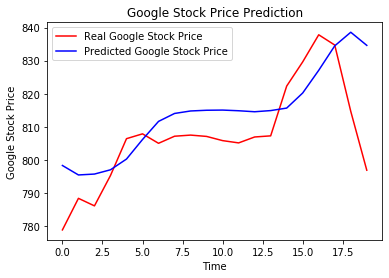

In [57]:
plt.plot(real_stock_prices, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [ ]:
X